In [221]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", 10)
igre = pd.read_csv("podatki_csv/igre.csv")

In [222]:
igre = igre.sort_values("Datum")
igre['Datum'] = pd.to_datetime(igre['Datum'])

igre.reset_index()

,index,Datum,Verzija,Modra_Stran,Rdeca_Stran,Zmagovalec,Modri_Igralci,Rdeci_Igralci,Liga
0,1365,2014-01-14,3.15,SK Gaming,Millenium,Millenium,"['fredy122', ' Svenskeren', ' Jesiz', ' CandyP...","['kev1n', ' Araneae', ' Kerp', ' Creaton', ' J...",LEC
1,1370,2014-01-14,3.15,Fnatic,Gambit Gaming,Fnatic,"['sOAZ', ' Cyanide', ' xPeke', ' Rekkles', ' Y...","['Darien', ' Diamond', ' Alex Ich', ' Genja', ...",LEC
2,1369,2014-01-14,3.15,Copenhagen Wolves,Alliance,Copenhagen Wolves,"['YoungBuck', ' Amazing', ' cowTard', ' FORG1V...","['Wickd', ' Shook', ' Froggen', ' Tabzz', ' Ny...",LEC
3,1368,2014-01-14,3.15,SUPA HOT CREW,Team ROCCAT,Team ROCCAT,"['Mimer', ' Impaler', ' Moopz', ' MrRalleZ', '...","['Xaxus', ' Jankos', ' Overpow', ' Celaver', '...",LEC
4,1367,2014-01-14,3.15,Alliance,Fnatic,Fnatic,"['Wickd', ' Shook', ' Froggen', ' Tabzz', ' Ny...","['sOAZ', ' Cyanide', ' xPeke', ' Rekkles', ' Y...",LEC
...,...,...,...,...,...,...,...,...,...
13293,12064,2024-08-12,14.15,JD Gaming,Ninjas in Pyjamas.CN,JD Gaming,"['Flandre', ' Kanavi', ' Yagao', ' Ruler', ' M...","['shanji', ' Leyan', ' Rookie', ' Photic', ' Z...",LPL
13294,12063,2024-08-12,14.15,Ninjas in Pyjamas.CN,JD Gaming,Ninjas in Pyjamas.CN,"['shanji', ' Leyan', ' Rookie', ' Photic', ' Z...","['Flandre', ' Kanavi', ' Yagao', ' Ruler', ' M...",LPL
13295,12065,2024-08-12,14.15,Ninjas in Pyjamas.CN,JD Gaming,Ninjas in Pyjamas.CN,"['shanji', ' Leyan', ' Rookie', ' Photic', ' Z...","['Flandre', ' Kanavi', ' Yagao', ' Ruler', ' M...",LPL
13296,12066,2024-08-12,14.15,JD Gaming,Ninjas in Pyjamas.CN,JD Gaming,"['Flandre', ' Kanavi', ' Yagao', ' Ruler', ' M...","['shanji', ' Leyan', ' Rookie', ' Photic', ' Z...",LPL


In [223]:
#nekatere ekipe so se preimenovale, zato želim vsa njihova imena upoštevati kot eno ekipo

preimenovane_ekipe = {'SK Telecom T1':'T1',
                      'DAMWON Gaming' : 'DWG KIA',
                      'Dplus KIA' : 'DWG KIA',
                      'KSV eSports' : 'Gen.G',
                      'Samsung Galaxy' : 'Gen.G',
                      'Afreeca Freecs':'Kwangdong Freecs',
                      'DragonX' : 'DRX'
}
igre['Modra_Stran'] = igre['Modra_Stran'].replace(preimenovane_ekipe)
igre['Rdeca_Stran'] = igre['Rdeca_Stran'].replace(preimenovane_ekipe)
igre['Zmagovalec'] = igre['Zmagovalec'].replace(preimenovane_ekipe)


In [224]:
stevilo_zmag = igre["Zmagovalec"].value_counts()

stevilo_zmag_tabela = stevilo_zmag.reset_index() 
stevilo_zmag_tabela.columns =['Ekipa', 'Zmage']

skupno = pd.concat([igre['Modra_Stran'], igre['Rdeca_Stran']]) #zdruzimo rdeci in modri stolpec
stevilo_iger = skupno.value_counts()
stevilo_iger_tabela = stevilo_iger.reset_index() 
stevilo_iger_tabela.columns =['Ekipa', 'Odigrane_Igre']

skupna = pd.merge(stevilo_zmag_tabela,stevilo_iger_tabela, on="Ekipa")
skupna['Odstotek_Zmag'] = (skupna['Zmage'] / skupna['Odigrane_Igre']) * 100
skupna['Odstotek_Zmag'] = skupna['Odstotek_Zmag'].round(2)
filtrirano = skupna[skupna['Odigrane_Igre'] >= 30]
filtrirano = filtrirano.sort_values("Odstotek_Zmag", ascending=False)
filtrirano

,Ekipa,Zmage,Odigrane_Igre,Odstotek_Zmag
1,Gen.G,483,721,66.99
0,T1,601,899,66.85
6,G2 Esports,388,606,64.03
13,JD Gaming,309,486,63.58
5,DWG KIA,392,618,63.43
...,...,...,...,...
77,Jin Air Green Wings,31,117,26.50
74,OKSavingsBank BRION,31,121,25.62
106,Team Coast,12,51,23.53
117,BRION,9,39,23.08


In [225]:
elo_ratings = {}
zacetni = 1000
K_faktor = 32

def predviden_rezultat(rating1, rating2):
    return 1 / (1 + 10 ** ((rating2 - rating1) / 400))

def posodobi_elo(zmagovalec, porazenec):
    zmaga = predviden_rezultat(elo_ratings[zmagovalec], elo_ratings[porazenec])
    poraz = 1 - zmaga

    elo_ratings[zmagovalec] += K_faktor * (1 - zmaga) #elo se posodobi po formuli Realne točke - pričakovane točke krat K-faktor, ki je na šahovksih lestvicah ponavadi nekje med 8 in 32, tu 32 zaradi manjsega stevila iger
    elo_ratings[porazenec] += K_faktor * (0 - poraz) #0 je vrednost poraza

zgodovina = [] #da lahko narišemo grafe, beležimo zgodovino elo ocene ekip


for i, vrstica in igre.iterrows():
    ekipa1 = vrstica['Modra_Stran']
    ekipa2 = vrstica['Rdeca_Stran']
    zmagovalec = vrstica['Zmagovalec']
    if zmagovalec == ekipa1:
        luzer = ekipa2
    else:
        luzer = ekipa1
    if ekipa1 not in elo_ratings:       #preverimo, če je to prva igra od neke ekipe in jo dodamo v slovar ratingov
        elo_ratings[ekipa1] = zacetni
    if ekipa2 not in elo_ratings:
        elo_ratings[ekipa2] = zacetni
    posodobi_elo(zmagovalec, luzer)
    zgodovina.append({'Datum' : vrstica['Datum'], 'Igra': i, 'Ekipa' : ekipa1, 'Elo' : elo_ratings[ekipa1]})
    zgodovina.append({'Datum': vrstica['Datum'], 'Igra': i, 'Ekipa' : ekipa2, 'Elo' : elo_ratings[ekipa2]})

zgodovina_data = pd.DataFrame(zgodovina)
zgodovina_data = zgodovina_data.sort_values(by='Datum')

elo_ratings_data = pd.DataFrame(elo_ratings.items(), columns=['Ekipa', 'Elo'])
pd.set_option("display.max_rows", 10)

elo_ratings_data = elo_ratings_data.sort_values('Elo')
elo_ratings_data


,Ekipa,Elo
9,Team Coast,772.867394
76,Jin Air Green Wings,796.581014
70,Immortals,797.342662
137,EStar (Chinese Team),807.796087
139,SeolHaeOne Prince,820.777970
...,...,...
67,G2 Esports,1277.837178
113,Bilibili Gaming,1319.444067
128,Top Esports,1343.292412
117,Hanwha Life Esports,1358.615874


Zdaj si poglejmo graf ratinga posamezne ekipe čez čas. Pogledali bomo pot trenutno najboljse ekipe GenG.

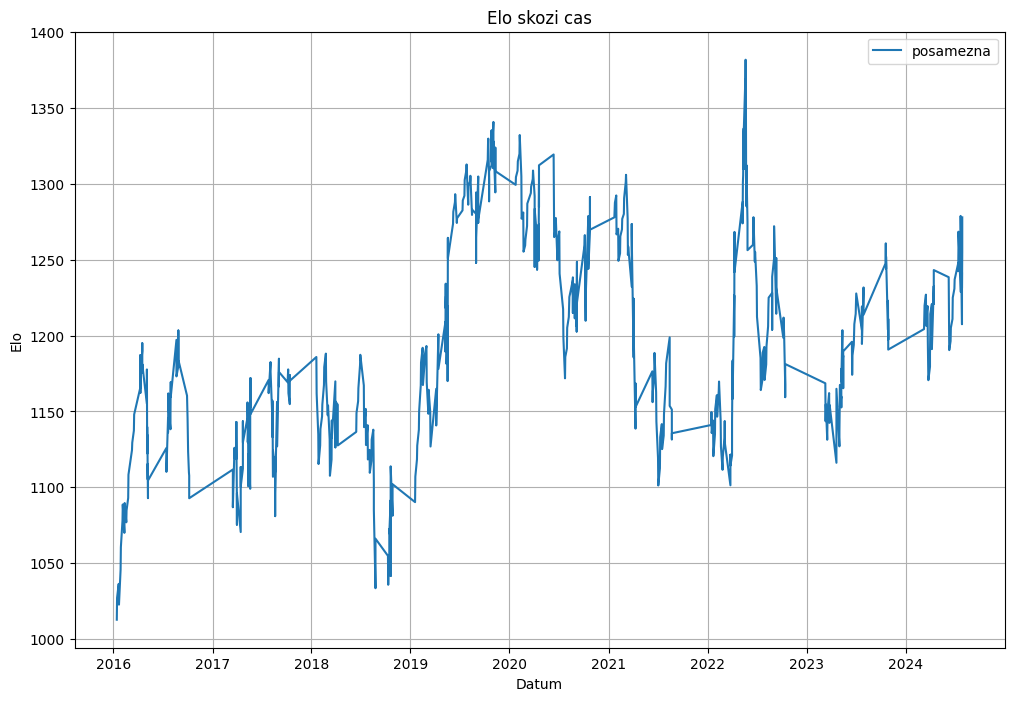

In [226]:
import matplotlib.dates as mdates
def posamezna_ekipa(ime):   #funkcija izriše graf ela skozi čas za poljubno ekipo
    posamezna_zgodovina = zgodovina_data[zgodovina_data['Ekipa'] == f'{ime}']
    plt.figure(figsize=(12, 8))
    plt.plot(posamezna_zgodovina['Datum'], posamezna_zgodovina['Elo'], label='posamezna')

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  #graf je najprej na x osi vse datume označil posebej, kar je vodilo do nepreglednosti
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())


    plt.xlabel('Datum')
    plt.ylabel('Elo')
    plt.title('Elo skozi cas')
    plt.legend()
    plt.grid(True)
    plt.show()
posamezna_ekipa('G2 Esports')

Poglejmo si zdaj, ali se elo rating, ki smo ga dodelili ekipam, ujema z njihovimi odstotki zmag. Predvidevamo, da bodo ekipe z največjim odstotkom zmag imele največji elo rating.

<Axes: title={'center': 'Elo rating v odvisnosti od odstotka zmag'}, xlabel='Odstotek_Zmag', ylabel='Elo'>

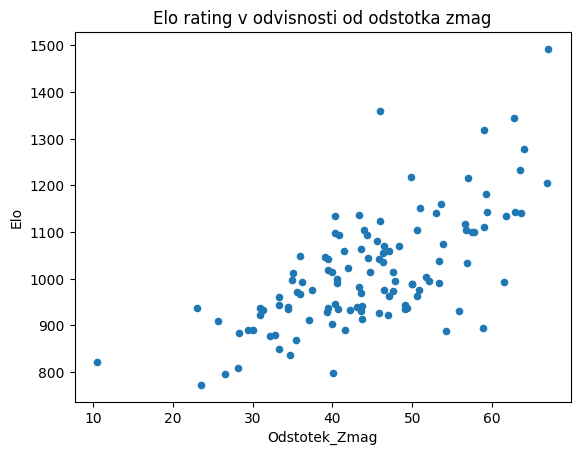

In [227]:
skupno = pd.merge(filtrirano, elo_ratings_data, on='Ekipa')
skupno.plot.scatter(y= 'Elo', x = 'Odstotek_Zmag', title = 'Elo rating v odvisnosti od odstotka zmag')

Zanima nas katera ekipa je imela najboljši povprečni elo vsako leto, torej katera ekipa je bila vsako leto najboljša. Nato bomo to primerjali s tem, katera ekipa je imela vsako leto največji odstotek zmag pri zadostnem številu odigranih iger.

In [228]:
zgodovina_data['Leto'] = zgodovina_data['Datum'].dt.year
povprecen_elo = zgodovina_data.groupby(['Ekipa', 'Leto'])['Elo'].mean().reset_index()
najboljse3 = povprecen_elo.sort_values(['Leto', 'Elo'], ascending = [True, False]).groupby('Leto').head(3).reset_index(drop=True)
pd.set_option("display.max_rows", None)
najboljse3


,Ekipa,Leto,Elo
0,Cloud9,2014,1148.331264
1,EDward Gaming,2014,1145.491445
2,Oh My God,2014,1135.034642
3,EDward Gaming,2015,1239.362872
4,T1,2015,1163.333167
5,Fnatic,2015,1156.906918
6,T1,2016,1248.231074
7,EDward Gaming,2016,1223.043200
8,LGD Gaming,2016,1178.800842
9,T1,2017,1299.205156


Poglejmo si še statistike posameznih igralcev. Prav tako poglejmo, kako dolga je v povprečju njihova kariera. Ker so ešporti zelo kompetitivni, domnevamo, da bo dokaj kratka.

Točkujmo ekipe še po "medaljah": prvo mesto je vredno 3, drugo 2 in tretje 1 točko


<Axes: xlabel='Ekipa'>

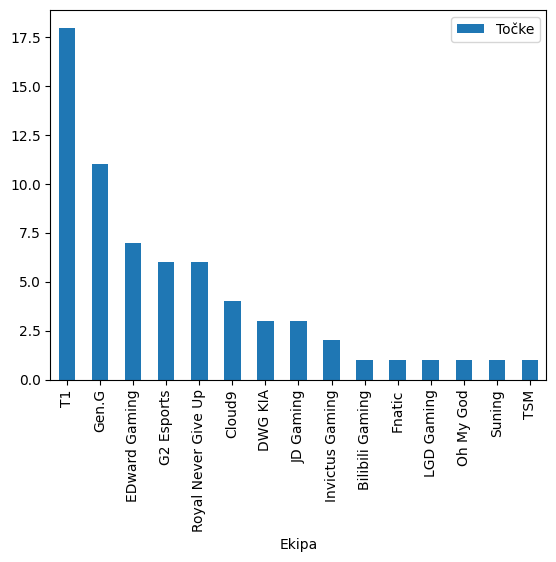

In [229]:

najboljse3['Točke'] = najboljse3.groupby('Leto').cumcount(ascending = False) #ker so indeksi 0, 1, 2 moramo prišteti vsaki točki še 1
najboljse3['Točke'] += 1
ekipe_tocke = najboljse3.groupby('Ekipa')['Točke'].sum().reset_index()
ekipe_tocke = ekipe_tocke.sort_values('Točke', ascending = False)
ekipe_tocke.plot.bar(x = 'Ekipa')


Še po winratih:

In [230]:
igre['Leto'] = igre['Datum'].dt.year
letne = {}
for _, vrstica in igre.iterrows():
    ekipa1 = vrstica['Modra_Stran']
    ekipa2 = vrstica['Rdeca_Stran']
    zmagovalec = vrstica['Zmagovalec']
    leto = vrstica['Leto']
    if leto not in letne:
        letne[leto] = {}
    if ekipa1 not in letne[leto]:
        letne[leto][ekipa1] = {'Igre' : 0, 'Zmage' : 0}
    if ekipa2 not in letne[leto]:
        letne[leto][ekipa2] = {'Igre' : 0, 'Zmage' : 0}
    letne[leto][ekipa1]['Igre'] += 1
    letne[leto][ekipa2]['Igre'] += 1
    letne[leto][zmagovalec]['Zmage'] += 1
po_ekipah = []
for leto, ekipe in letne.items():
    for ekipa, statistika in ekipe.items():
        winrate = statistika['Zmage'] / statistika['Igre'] if statistika ['Igre'] != 0 else 0
        po_ekipah.append({'Ekipa': ekipa, 'Leto' : leto, 'Igre' : statistika['Igre'], 'Zmage' : statistika['Zmage'], 'Odstotek_Zmag' : winrate})
po_ekipah_data = pd.DataFrame(po_ekipah)
po_ekipah_data = po_ekipah_data[po_ekipah_data['Igre'] > 30]
najboljse3 = po_ekipah_data.sort_values(['Leto', 'Odstotek_Zmag'], ascending = [True, False]).groupby('Leto').head(3).reset_index(drop=True)
najboljse3


,Ekipa,Leto,Igre,Zmage,Odstotek_Zmag
0,Cloud9,2014,80,57,0.712500
1,EDward Gaming,2014,86,60,0.697674
2,Oh My God,2014,99,64,0.646465
3,T1,2015,31,25,0.806452
4,EDward Gaming,2015,120,88,0.733333
5,Fnatic,2015,76,54,0.710526
6,Immortals,2016,43,31,0.720930
7,EDward Gaming,2016,39,27,0.692308
8,T1,2016,78,53,0.679487
9,T1,2017,73,51,0.698630


<Axes: xlabel='Ekipa'>

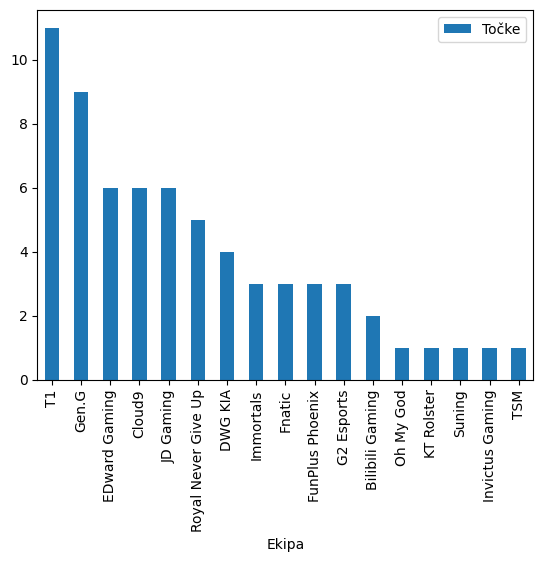

In [231]:

najboljse3['Točke'] = najboljse3.groupby('Leto').cumcount(ascending = False) #ker so indeksi 0, 1, 2 moramo prišteti vsaki točki še 1
najboljse3['Točke'] += 1
ekipe_tocke = najboljse3.groupby('Ekipa')['Točke'].sum().reset_index()
ekipe_tocke = ekipe_tocke.sort_values('Točke', ascending = False)
ekipe_tocke.plot.bar(x = 'Ekipa')

Povprečna kariera je dolga toliko iger: 83.89905362776025
Največ iger je odigral:
 Igralec             Deft
Igre                 843
Zmage                502
Zaokrozene_Igre    850.0
Name: 243, dtype: object
Največ iger je zmagal:
 Igralec            Faker
Igre                 827
Zmage                563
Zaokrozene_Igre    825.0
Name: 368, dtype: object


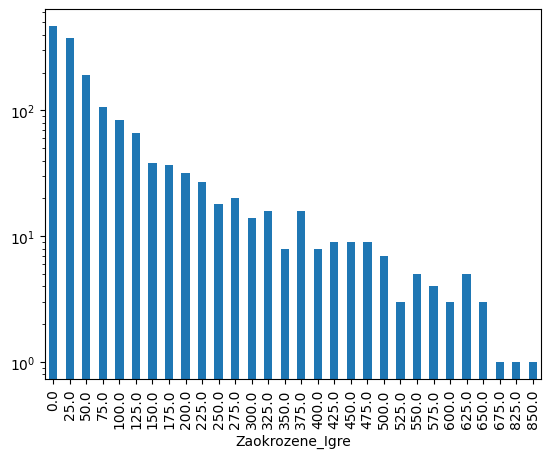

In [232]:
pd.set_option("display.max_rows", 10) #prej smo spremenili

igralci = {}
for i, vrstica in igre.iterrows():
    igralci1 = eval(vrstica['Modri_Igralci']) #ker igralci v panda data framu niso bili shranjeni kot list ampak kot string
    igralci1 = [igralec.strip() for igralec in igralci1]
    igralci2 = eval(vrstica['Rdeci_Igralci'])
    igralci2 = [igralec.strip() for igralec in igralci2]

    for igralec in igralci1:
        if not igralec in igralci:
            if vrstica['Zmagovalec'] == vrstica['Modra_Stran']:
                igralci[igralec] = {'Igre' : 1, 'Zmage' : 1}
            else:
                igralci[igralec] = {'Igre' : 1, 'Zmage' : 0}
        else:
            if vrstica['Zmagovalec'] == vrstica['Modra_Stran']:
                igralci[igralec]['Igre'] += 1
                igralci[igralec]['Zmage'] += 1
            else:
                igralci[igralec]['Igre'] += 1
    for igralec in igralci2:
        if not igralec in igralci:
            if vrstica['Zmagovalec'] == vrstica['Rdeca_Stran']:
                igralci[igralec] = {'Igre' : 1, 'Zmage' : 1}
            else:
                igralci[igralec] = {'Igre' : 1, 'Zmage' : 0}
        else:
            if vrstica['Zmagovalec'] == vrstica['Rdeca_Stran']:
                igralci[igralec]['Igre'] += 1
                igralci[igralec]['Zmage'] += 1
            else:
                igralci[igralec]['Igre'] += 1
igralci_data = pd.DataFrame(igralci).T.reset_index()
igralci_data.columns = ['Igralec', 'Igre', 'Zmage']

def zaokrozi(x, baza):
    return baza * round(x / baza) 

igralci_data['Zaokrozene_Igre'] = zaokrozi(igralci_data['Igre'], 25)

igralci_kariere = igralci_data.groupby('Zaokrozene_Igre').size() 
igralci_kariere.plot.bar(logy = True) #opazimo, da dolžina kariere pada eksponentno, zato dodamo logy = True
print(f"Povprečna kariera je dolga toliko iger: {igralci_data['Igre'].mean()}")
print(f"Največ iger je odigral:\n {igralci_data.loc[igralci_data['Igre'].idxmax()]}")
print(f"Največ iger je zmagal:\n {igralci_data.loc[igralci_data['Zmage'].idxmax()]}")

In [233]:
igralci_data_f = igralci_data[igralci_data['Igre'] >= 50]

igralci_data_f['Odstotek_Zmag'] = igralci_data_f['Zmage'] / igralci_data_f['Igre'] * 100
igralci_data_f = igralci_data_f.sort_values("Odstotek_Zmag", ascending=False)
igralci_data_f




/var/folders/xs/4t9mxpt11fgczvx6bc0zc_7h0000gn/T/ipykernel_2603/1451048218.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  igralci_data_f['Odstotek_Zmag'] = igralci_data_f['Zmage'] / igralci_data_f['Igre'] * 100


,Igralec,Igre,Zmage,Zaokrozene_Igre,Odstotek_Zmag
314,meiko,50,41,50.0,82.000000
1433,Peyz,213,165,225.0,77.464789
172,ClearLove,87,65,75.0,74.712644
212,PawN,194,141,200.0,72.680412
87,Koro1,203,144,200.0,70.935961
...,...,...,...,...,...
1520,Pollu,64,15,75.0,23.437500
875,Uniboy,55,12,50.0,21.818182
1260,NUCLEARINT,54,10,50.0,18.518519
795,Grace,55,10,50.0,18.181818


Dodajmo še elo rating za igralce. To bomo storili podobno kot pri ekipah, pri čemer bo sprememba ela enaka takšni, kjer bomo upoštevali povprečen elo na vsako ekipi.

In [234]:
elo_igralci = {}
zgodovina_igralci = []
zacetni1 = 1000
K_faktor1 = 32

def dodaj(seznam):  #za malo boljšo preglednost
    for igralec in seznam:
        if not igralec in elo_igralci:
            elo_igralci[igralec] = zacetni1

def povprecen_ekipni(seznam):
    vse = 0
    for igralec in seznam:
        vse += elo_igralci[igralec]
    return vse / 5 #vedno je na ekipi 5 igralcev

def posodobi_igralci(seznam, sprememba): #ker nimamo dobrega merila o vplivu igralcev na igro, bomo vsem prišteli enako spremembo ela
    for igralec in seznam:
        elo_igralci[igralec] += sprememba

for i, vrstica in igre.iterrows():
    igralci1 = eval(vrstica['Modri_Igralci']) 
    igralci1 = [igralec.strip() for igralec in igralci1]
    igralci2 = eval(vrstica['Rdeci_Igralci'])
    igralci2 = [igralec.strip() for igralec in igralci2]

    dodaj(igralci1)
    dodaj(igralci2)
    
    povp1 = povprecen_ekipni(igralci1)
    povp2 = povprecen_ekipni(igralci2)

    ekipa1 = vrstica['Modra_Stran']
    ekipa2 = vrstica['Rdeca_Stran']
    zmagovalec = vrstica['Zmagovalec']
    if zmagovalec == ekipa1:
        zmaga = predviden_rezultat(povp1, povp2)
        posodobi_igralci(igralci1, K_faktor1 * (1 - zmaga))
        posodobi_igralci(igralci2, K_faktor1 * (zmaga - 1)) #podobno kot prej, poraz je zmaga - 1, vrednost poraza je 0, prišteje se K faktor krat vrednost poraza - poraz (poraz in zmaga tu pomenita elo predikcijo zmage in poraza)
    else:
        zmaga = predviden_rezultat(povp2, povp1)
        posodobi_igralci(igralci2, K_faktor1 * (1 - zmaga))
        posodobi_igralci(igralci1, K_faktor1 * (zmaga - 1))

    for igralec in igralci1:
        zgodovina_igralci.append({'Datum' : vrstica['Datum'], 'Igra': i, 'Igralec' : igralec, 'Elo' : elo_igralci[igralec]})
    for igralec in igralci2:
        zgodovina_igralci.append({'Datum' : vrstica['Datum'], 'Igra': i, 'Igralec' : igralec, 'Elo' : elo_igralci[igralec]})

    
elo_igralci_data = pd.DataFrame(elo_igralci.items(), columns=['Ekipa', 'Elo'])
pd.set_option("display.max_rows", 10)

elo_igralci_data = elo_igralci_data.sort_values('Elo')
elo_igralci_data

,Ekipa,Elo
389,Smoothie,569.052299
600,Max,709.321354
954,Route,710.996067
849,y4,728.574754
1011,Aliez,730.815759
...,...,...
368,Faker,1628.237238
1098,Bin,1642.542544
519,Peanut,1658.274807
841,Chovy,1694.757509


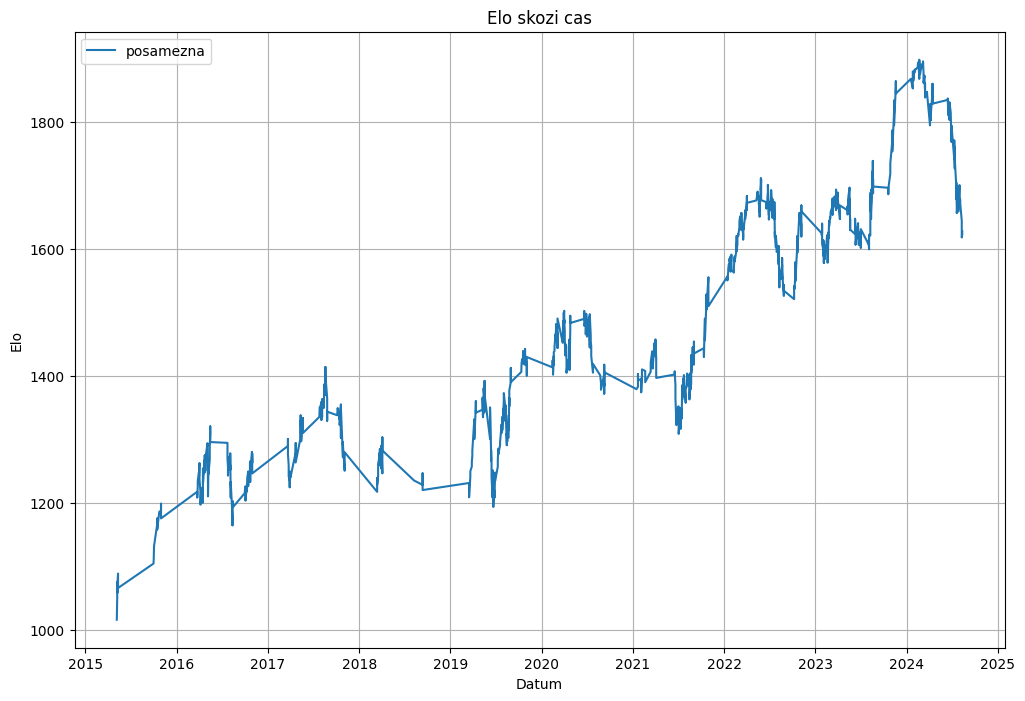

In [238]:
zgodovina_igralci_data = pd.DataFrame(zgodovina_igralci)
zgodovina_igralci_data = zgodovina_igralci_data.sort_values(by='Datum')

def posamezni_igralec(ime):   #funkcija izriše graf ela skozi čas za poljubnega igralca
    posamezna_zgodovina = zgodovina_igralci_data[zgodovina_igralci_data['Igralec'] == f'{ime}']
    plt.figure(figsize=(12, 8))
    plt.plot(posamezna_zgodovina['Datum'], posamezna_zgodovina['Elo'], label='posamezna')

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y')) 
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())


    plt.xlabel('Datum')
    plt.ylabel('Elo')
    plt.title('Elo skozi cas')
    plt.legend()
    plt.grid(True)
    plt.show()
posamezni_igralec('Faker')


Analizirajmo še elo porazdelitve igralcev in ekip. Pričakujemo naravno distribucijo.

<Axes: xlabel='Zaokrozen_Elo'>

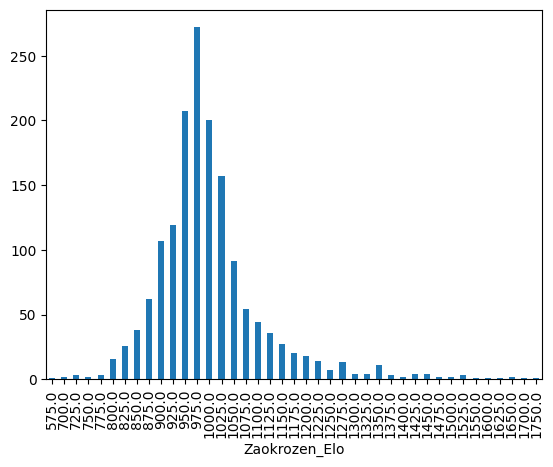

In [236]:
elo_igralci_data['Zaokrozen_Elo'] = zaokrozi(elo_igralci_data['Elo'], 25)
elo_graf1 = elo_igralci_data.groupby(by='Zaokrozen_Elo').size()
elo_graf1.plot.bar()


<Axes: xlabel='Zaokrozen_Elo'>

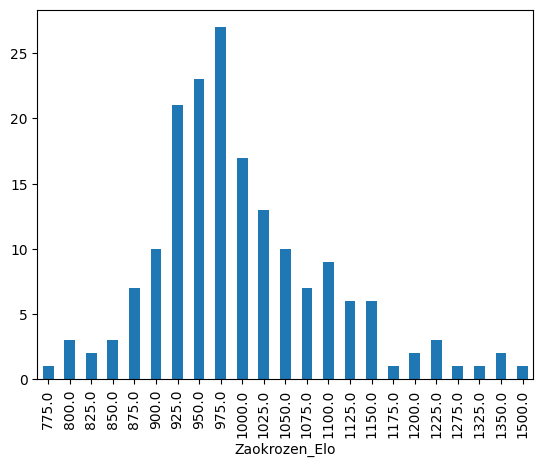

In [237]:
elo_ratings_data['Zaokrozen_Elo'] = zaokrozi(elo_ratings_data['Elo'], 25)
elo_graf2 = elo_ratings_data.groupby(by='Zaokrozen_Elo').size()
elo_graf2.plot.bar()

Pogledali si bomo še razporeditev igralcev po različnih ligah. Pri tem dojemamo igralca kot člana lige, v kateri je nazadnje nastopil.